TASK 1

1. Import the libraries I might use 

In [157]:
import pandas as pd
import numpy as np
import missingno as msno
from pandas.plotting import scatter_matrix as scmx
import seaborn as sns

2. Load the data and check its first 5 rows

In [158]:
df = pd.read_csv('./China Aug 2022 Asteroid 1.csv')
df.head()

,ID,Alamosite,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Semseyite,Creedite,Xieite,Eveite,Rutile,Tyrolite,Feroxyhyte,Kostovite
0,Ast_000001,1893,3812,4945,4139,2689,3768,9569,3164,4259,2396,4239,12622,2955,5695,3161,3115,3356,3309
1,Ast_000002,3604,4652,2587,2021,4569,1844,16390,1598,3981,5562,2426,6278,4205,3471,1100,2433,3845,1607
2,Ast_000003,4370,4676,2648,2375,4468,1037,19471,1495,3981,5267,1924,7317,3366,2485,1598,2313,3802,1905
3,Ast_000004,2767,5068,1547,2958,3945,2363,13061,4045,3327,3581,2042,9063,5112,2422,4076,4758,4329,2643
4,Ast_000005,2007,4186,3776,3177,3575,2242,10044,3059,4721,2719,4707,9740,4266,3564,1595,2919,1938,4296


3. Check the datatype of each column

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4966 non-null   object
 1   Alamosite        4961 non-null   object
 2   Chalcophyllite   4960 non-null   object
 3   Gypsum           4964 non-null   object
 4   Orpiment         4960 non-null   object
 5   Junitoite        4961 non-null   object
 6   Phoenicochroite  4959 non-null   object
 7   Groutite         4965 non-null   object
 8   Zykaite          4959 non-null   object
 9   Weloganite       4964 non-null   object
 10  Diadochite       4962 non-null   object
 11  Semseyite        4961 non-null   object
 12  Creedite         4962 non-null   object
 13  Xieite           4959 non-null   object
 14  Eveite           4961 non-null   object
 15  Rutile           4964 non-null   object
 16  Tyrolite         4960 non-null   object
 17  Feroxyhyte       4960 non-null   

4. Visualise the patterns of missing data

<AxesSubplot:>

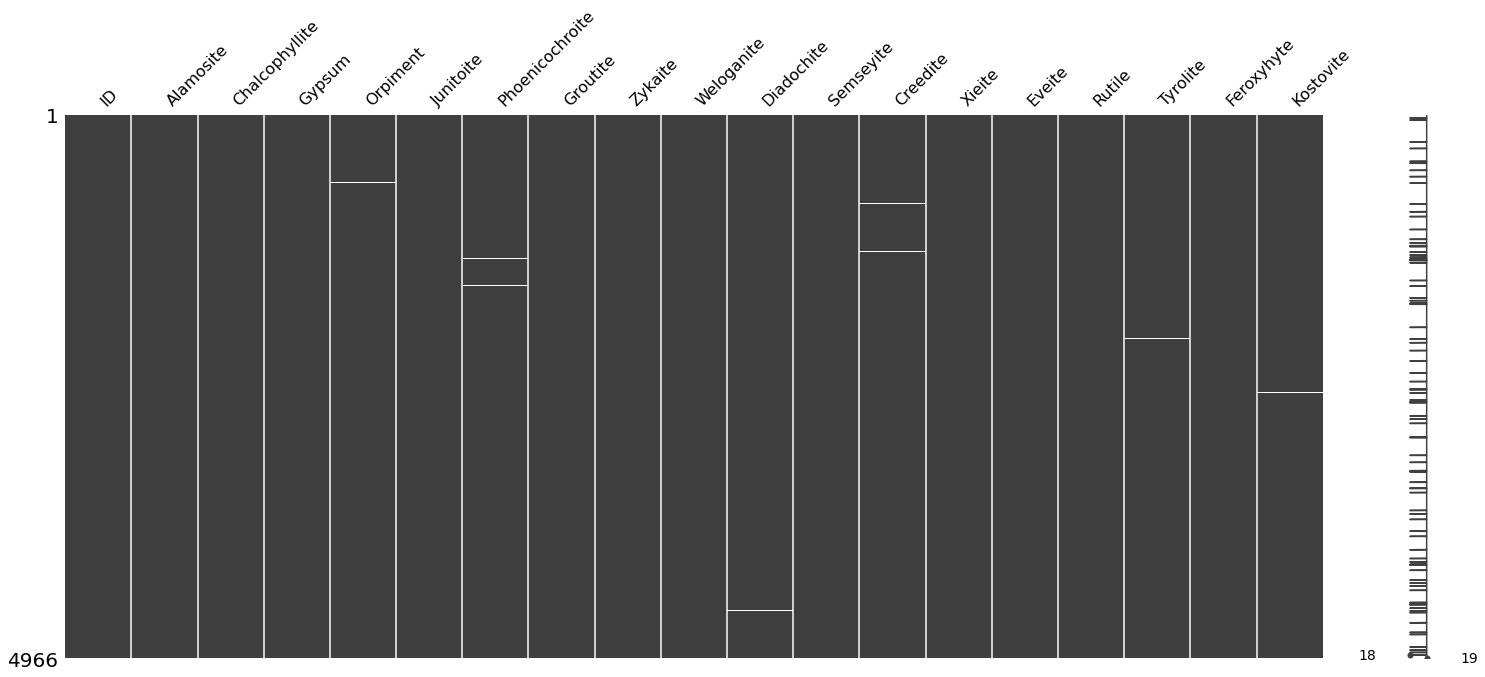

In [160]:
msno.matrix(df)

5. Turn all the data types except the first column into numerical, simultaneously turning all the weird values (like "86ki" which may cause error) into NaN for further processing

In [161]:
df = pd.concat([df['ID'],df.iloc[:, 1:].apply(pd.to_numeric,errors = "coerce")],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4966 non-null   object 
 1   Alamosite        4959 non-null   float64
 2   Chalcophyllite   4955 non-null   float64
 3   Gypsum           4960 non-null   float64
 4   Orpiment         4955 non-null   float64
 5   Junitoite        4956 non-null   float64
 6   Phoenicochroite  4954 non-null   float64
 7   Groutite         4952 non-null   float64
 8   Zykaite          4955 non-null   float64
 9   Weloganite       4963 non-null   float64
 10  Diadochite       4958 non-null   float64
 11  Semseyite        4958 non-null   float64
 12  Creedite         4945 non-null   float64
 13  Xieite           4957 non-null   float64
 14  Eveite           4959 non-null   float64
 15  Rutile           4962 non-null   float64
 16  Tyrolite         4958 non-null   float64
 17  Feroxyhyte    

6. Impute missing data using the mean of other data from the same feature 

<AxesSubplot:>

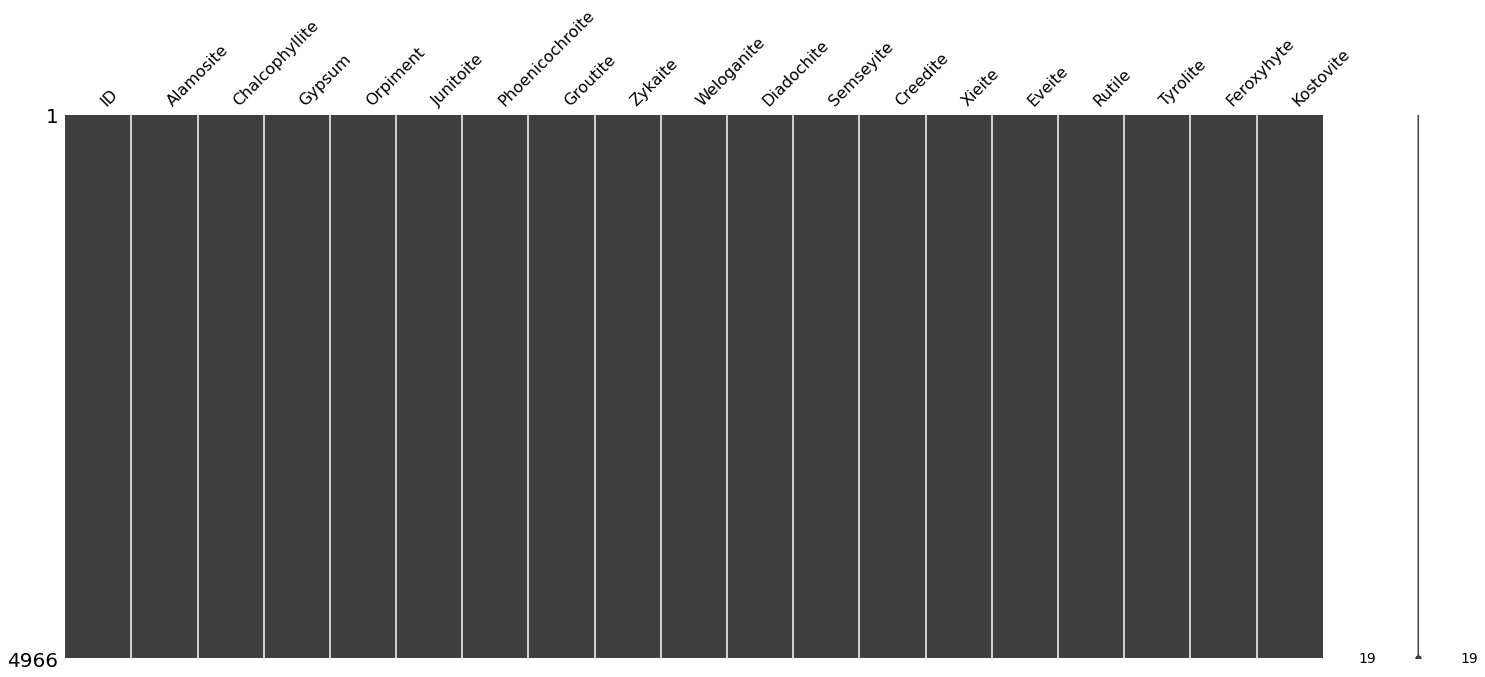

In [162]:
for col in df:
    if df[col].dtypes != object:
        df[col].fillna(df[col].mean(), inplace=True)
msno.matrix(df)

7. Try Silhouette Method to decide the number of clusters

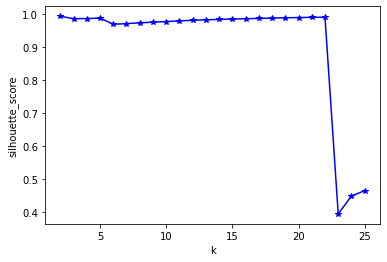

In [163]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def k_silhouette(X, clusters):
    K = range(2, clusters+1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, S, 'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')

    plt.show();

k_silhouette(df.iloc[:, 1:], 25)

I found that according to silhouette score, their should be one cluster. This may not be a desirable result. I therefore tried the Elbow Method.  

8. Try Elbow Method to decide the number of clusters

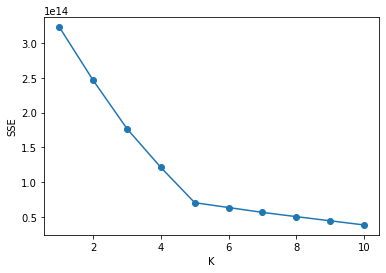

In [164]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k,)
    kmeans.fit(df.iloc[:, 1:])
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

It seems reasonable to choose 5 as k

In [165]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df.iloc[:,1:])

KMeans(n_clusters=5)

In [166]:
y_km = kmeans.fit_predict(df.iloc[:,1:])   

9. PCA for Dimensionality Reduction

In [167]:
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA 

In [168]:
pca = PCA(3)
projected = pca.fit_transform(df.iloc[:, 1:])

C:\Users\23388\AppData\Local\Temp\ipykernel_20152\781512056.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


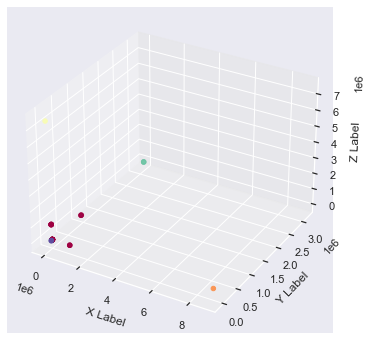

In [169]:
%matplotlib inline
x = projected[:, 0]
y = projected[:, 1]
z = projected[:, 2]

fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x,y,z, c = y_km,
            cmap = plt.cm.get_cmap('Spectral', 20))

ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

fig2.show()

So it turns out that there should be 8 clusters.  
[Answer to bullet point 1]  
there are 8 distinct type of asteroid  
[Answer to bullet point 2-2]  
the above 3-D plot shows the spread of the centroids

In [170]:
kmeans = KMeans(n_clusters=8)
y_km = kmeans.fit_predict(df.iloc[:,1:])   

9. find the centeroids of the clusters

In [171]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids)
centroids_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.470579e+03,4.255317e+03,4201.201949,3.152773e+03,4888.070615,3620.844531,1.648770e+04,3.300878e+03,3.492354e+03,4087.796946,3635.242508,1.047095e+04,4128.340767,4726.942005,2.564740e+03,4298.683300,4322.076711,3674.739887
1,3.935000e+03,8.745635e+06,1963.000000,4.586000e+03,1894.000000,3515.000000,1.773400e+04,2.020000e+03,3.814000e+03,1971.000000,3132.000000,1.397900e+04,3216.000000,4277.000000,2.957000e+03,3665.000000,2868.000000,3773.000000
2,3.647571e+03,2.919286e+03,2607.000000,1.000248e+06,4041.000000,3408.285714,1.658814e+04,3.727857e+03,3.475000e+03,4529.714286,3914.142857,3.000947e+06,4597.714286,2710.714286,2.293714e+03,3108.285714,3961.285714,3620.000000
3,1.000213e+06,3.570000e+03,3533.666667,2.897000e+03,3775.666667,3295.333333,4.002860e+06,4.157667e+03,2.884333e+03,3289.000000,3542.000000,8.896000e+03,3572.000000,3664.666667,2.394000e+03,3272.000000,3908.000000,3030.000000
4,4.133000e+03,2.356000e+03,1675.000000,3.495000e+03,1680.000000,3993.000000,1.853300e+04,1.184000e+03,3.775000e+03,2516.000000,2808.000000,1.069200e+04,2163.000000,4200.000000,7.456354e+06,3435.000000,3204.000000,3699.000000
5,3.752857e+03,3.793571e+03,2727.571429,2.999143e+03,4050.142857,2777.142857,1.701214e+04,2.982714e+03,3.630714e+03,4044.714286,3068.142857,9.201429e+03,3683.285714,3109.000000,1.000246e+06,3158.714286,3615.571429,2952.142857
6,3.176000e+03,3.674833e+03,2631.666667,3.295000e+03,3691.833333,2757.000000,1.470317e+04,2.855667e+03,1.000256e+06,3602.666667,3269.333333,1.008583e+04,4024.166667,2878.166667,2.420000e+03,3352.166667,3110.833333,3234.666667
7,3.311714e+03,3.948429e+03,2980.571429,2.847143e+03,3831.285714,2751.428571,1.524914e+04,1.000252e+06,3.192000e+03,3434.285714,3196.428571,8.742571e+03,3871.857143,3168.714286,3.223571e+03,3668.000000,4005.000000,2807.428571


[Answer to bullet point 2-1]  
I provide the typical mixture of minerals for each type of asteroid.

In [172]:
kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

50723074500236.61

10. Use OPTICS to Decide the Clusters

In [173]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [174]:
optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05).fit(df.iloc[:,1:])   

In [175]:
pca = PCA(3)
projected = pca.fit_transform(df.iloc[:, 1:])

C:\Users\23388\AppData\Local\Temp\ipykernel_20152\2485118245.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


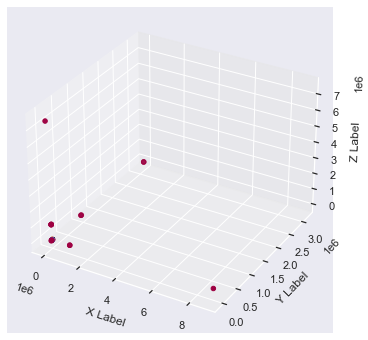

In [176]:
%matplotlib inline
x = projected[:, 0]
y = projected[:, 1]
z = projected[:, 2]

fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x,y,z, c = optics.labels_,
            cmap = plt.cm.get_cmap('Spectral', 20))

ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

fig2.show()

In the graph we can see that via OPTICS, similar pattern of clusters is shown.

TASK 2

1. Import the libraries I might use  

In [102]:
import pandas as pd
import numpy as np
import missingno as msno
from pandas.plotting import scatter_matrix as scmx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

2. Load the data and check its first 5 rows

In [103]:
df = pd.read_csv("./China Aug 2022 Asteroid 2 v4.csv")
df.head()

,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Category
0,218,490,25,184.0,316,823,115,325,3711,1
1,731,720,436,183.0,66,778,31,557,4613,0
2,950,964,300,912.0,601,188,114,556,1336,0
3,833,568,255,893.0,638,859,681,749,1836,0
4,938,904,328,992.0,795,602,965,928,3381,0


3. Check the datatype of each column

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chalcophyllite   1108 non-null   object 
 1   Gypsum           1110 non-null   object 
 2   Orpiment         1107 non-null   object 
 3   Junitoite        1113 non-null   float64
 4   Phoenicochroite  1107 non-null   object 
 5   Groutite         1111 non-null   object 
 6   Zykaite          1109 non-null   object 
 7   Weloganite       1109 non-null   object 
 8   Diadochite       1108 non-null   object 
 9   Category         1109 non-null   object 
dtypes: float64(1), object(9)
memory usage: 87.1+ KB


4. Visualise the patterns of missing data

<AxesSubplot:>

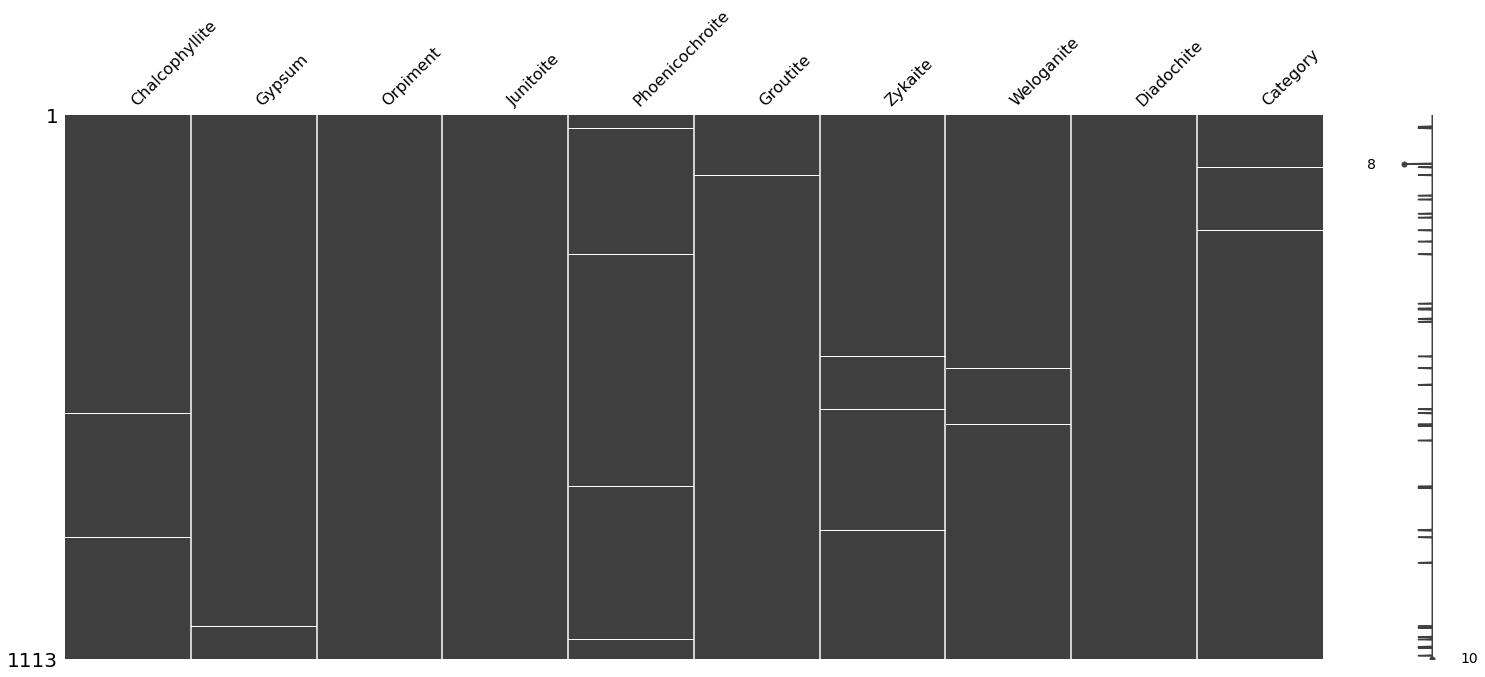

In [105]:
msno.matrix(df)

5. Turn all the data types except the first column into numerical, simultaneously turning all the weird values (like "86ki" which may cause error) into NaN for further processing

In [106]:
df = df.apply(pd.to_numeric,errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chalcophyllite   1107 non-null   float64
 1   Gypsum           1106 non-null   float64
 2   Orpiment         1102 non-null   float64
 3   Junitoite        1113 non-null   float64
 4   Phoenicochroite  1105 non-null   float64
 5   Groutite         1108 non-null   float64
 6   Zykaite          1108 non-null   float64
 7   Weloganite       1108 non-null   float64
 8   Diadochite       1107 non-null   float64
 9   Category         1107 non-null   float64
dtypes: float64(10)
memory usage: 87.1 KB


6. Impute missing data using the mean of other data from the same feature 

<AxesSubplot:>

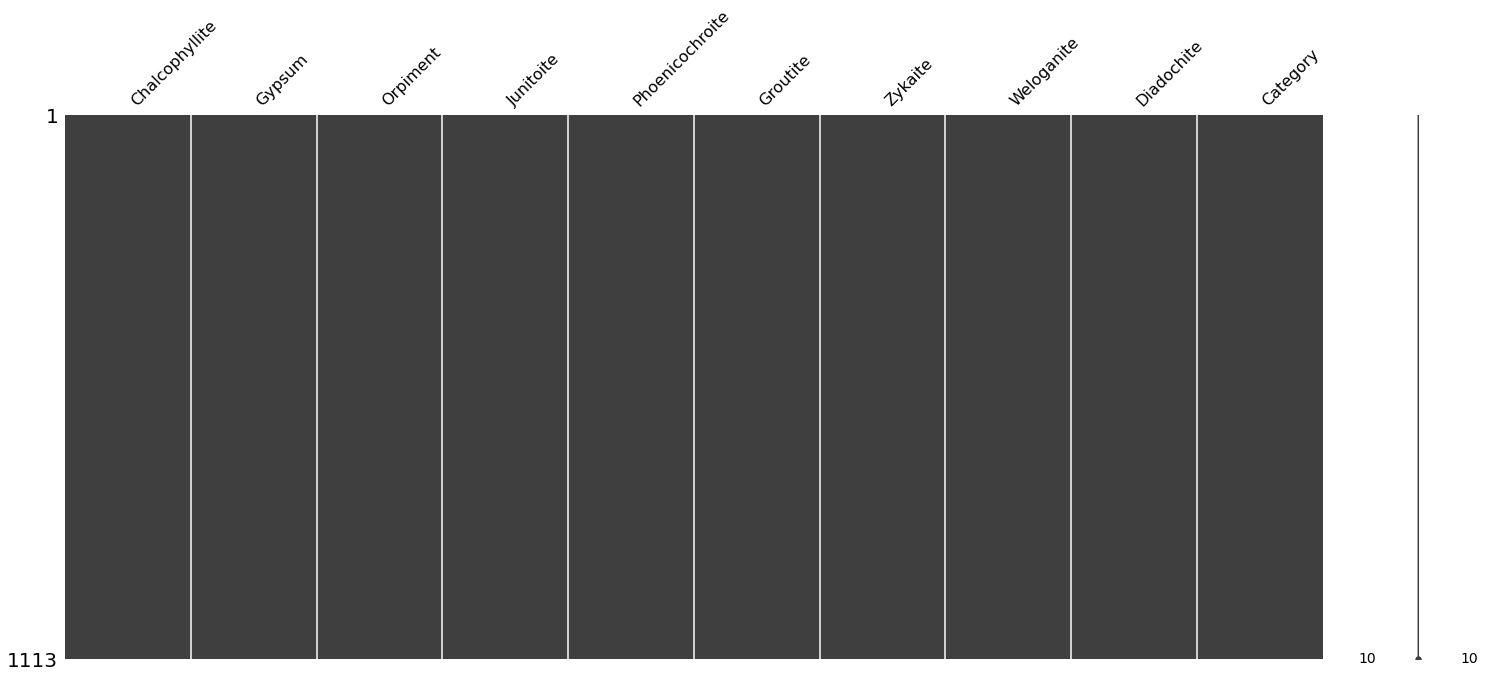

In [107]:
for col in df:
    if df[col].dtypes != object:
        df[col].fillna(df[col].mean(), inplace=True)
msno.matrix(df)

7. Drop the rows where the category is not 1 or 0

In [108]:
from operator import index

df = df[df.Category.isin([1, 0]) == True]


Method 1--Logistic Regression

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [110]:
X = df.iloc[:, 0:9]
Y = df['Category']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [112]:
logModel = LogisticRegression(solver = 'liblinear')
logModel = logModel.fit(X_train, y_train)
predictions = logModel.predict(X_test)
print(logModel.score(X_test, y_test))

0.9230769230769231


Make a List Including Test Scores

In [113]:
score_list = []
score_list.append(logModel.score(X_test, y_test))

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


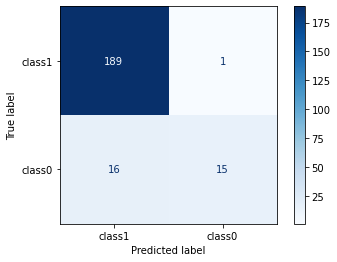

0.9230769230769231


In [114]:
plot_confusion_matrix(logModel, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(logModel.score(X_test, y_test))

Method 2-- Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier


In [116]:
param_grid = [
    {'ccp_alpha':[0.0, 0.005, 0.007, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1],
    'criterion':['gini', 'entropy'],
    'max_depth':[2,3,4,5,6,7,8,9],
    'max_leaf_nodes':[2,3,4,5,6,7,8,9]}
]

In [117]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9411764705882353

In [118]:
score_list.append(rfc.score(X_test, y_test))

In [120]:
clf = GridSearchCV(estimator=rfc, param_grid=param_grid)
best_rfmodel = clf.fit(X_train, y_train)

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


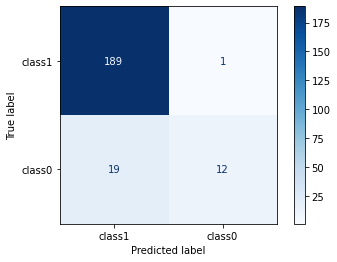

0.9095022624434389


In [121]:
plot_confusion_matrix(best_rfmodel, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(best_rfmodel.score(X_test, y_test))

In [122]:
score_list.append(best_rfmodel.score(X_test, y_test))

Method3--Decision Tree Classifier

In [123]:
from sklearn import tree
 
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=6, ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, random_state=42)

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


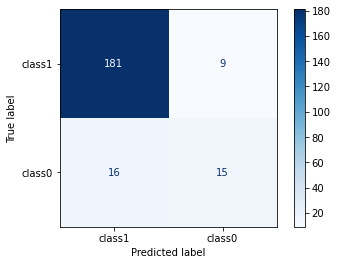

0.9011363636363636


In [124]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [125]:
score_list.append(clf.score(X_train, y_train))

Method 4--GBDT(Gradient Boosting Decision Tree) Classifier

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
 
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


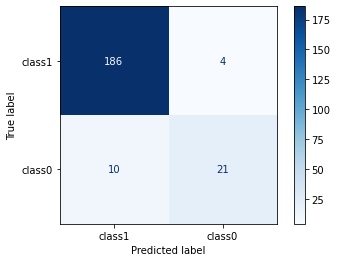

1.0


In [127]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [128]:
score_list.append(clf.score(X_train, y_train))

Method 5--AdaBoost Classifier

In [129]:
from sklearn.ensemble import  AdaBoostClassifier
 
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier()

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


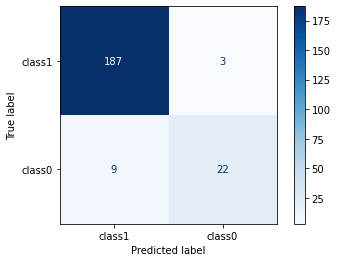

0.9897727272727272


In [130]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [131]:
score_list.append(clf.score(X_train, y_train))

Method 6--GaussianNB classifier

In [132]:
from sklearn.naive_bayes import GaussianNB
 
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


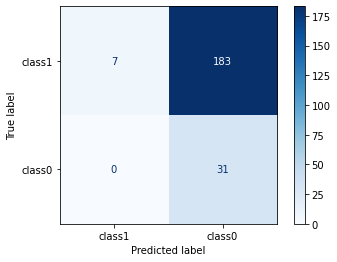

0.18977272727272726


In [133]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [134]:
score_list.append(clf.score(X_train, y_train))

Method 7--Linear Discriminant Analysis

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


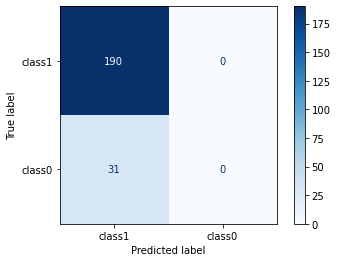

0.8556818181818182


In [136]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [137]:
score_list.append(clf.score(X_train, y_train))

Method 8--Quadratic Discriminant Analysis

In [138]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


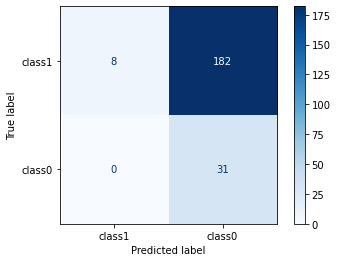

0.18977272727272726


In [139]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [140]:
score_list.append(clf.score(X_train, y_train))

Method 9--SVM Classifer

In [141]:
from sklearn.svm import SVC
 
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


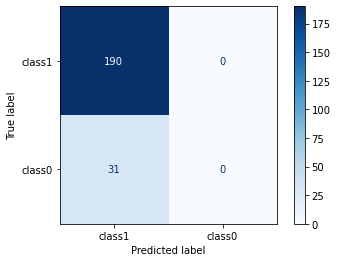

0.8556818181818182


In [142]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [143]:
score_list.append(clf.score(X_train, y_train))

Method 10--Multinomial Naive Bayes Classifier   

In [144]:
from sklearn.naive_bayes import MultinomialNB
 
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


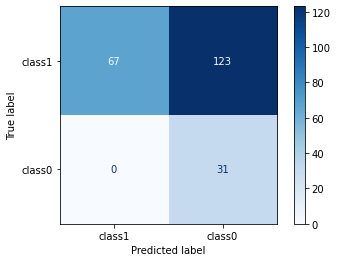

0.4193181818181818


In [145]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [146]:
score_list.append(clf.score(X_train, y_train))

Method 11--KNN Classifier

In [147]:
from sklearn.neighbors import KNeighborsClassifier
 
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


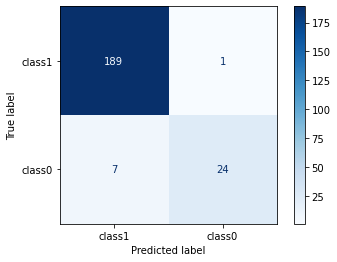

0.9534090909090909


In [148]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [149]:
score_list.append(clf.score(X_train, y_train))

Method 12--Perception

In [150]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=42, max_iter = 500, tol = 1)
clf.fit(X_train, y_train)

Perceptron(max_iter=500, random_state=42, tol=1)

e:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


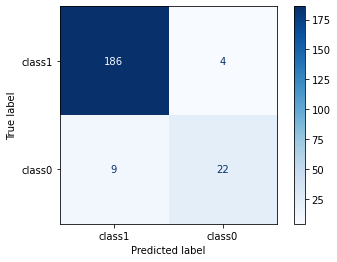

0.9306818181818182


In [151]:
plot_confusion_matrix(clf, X_test, y_test, 
                      display_labels=['class1', 'class0'],
                      cmap = 'Blues')  # cmap = plt.cm.Blues
plt.show()
print(clf.score(X_train, y_train))

In [152]:
score_list.append(clf.score(X_train, y_train))

Results  

We have tested 12 common machine learning methods (some with best tuned parameters). We have obtained their confusion matrices and scores. Now we can compare them.

In [153]:
classifiers = ['LogisticRegression',
                'RandomForest',
                'RFC-Tuned',
                'DecisionTree',
                'GradientBoosting',
                'AdaBoost',
                'GaussianNB',
                'LinearDA',
                'QuadraticDA',
                'SVM',
                'MultinomialNB',
                'KNN',
                'Perceptron']

In [154]:
dic = {'Classifier':classifiers,'Score':score_list}
data = pd.DataFrame(dic)
data = data.sort_values("Score",ascending=False)

In [155]:
data

,Classifier,Score
4,GradientBoosting,1.000000
5,AdaBoost,0.989773
11,KNN,0.953409
1,RandomForest,0.941176
12,Perceptron,0.930682
0,LogisticRegression,0.923077
2,RFC-Tuned,0.909502
3,DecisionTree,0.901136
7,LinearDA,0.855682
9,SVM,0.855682


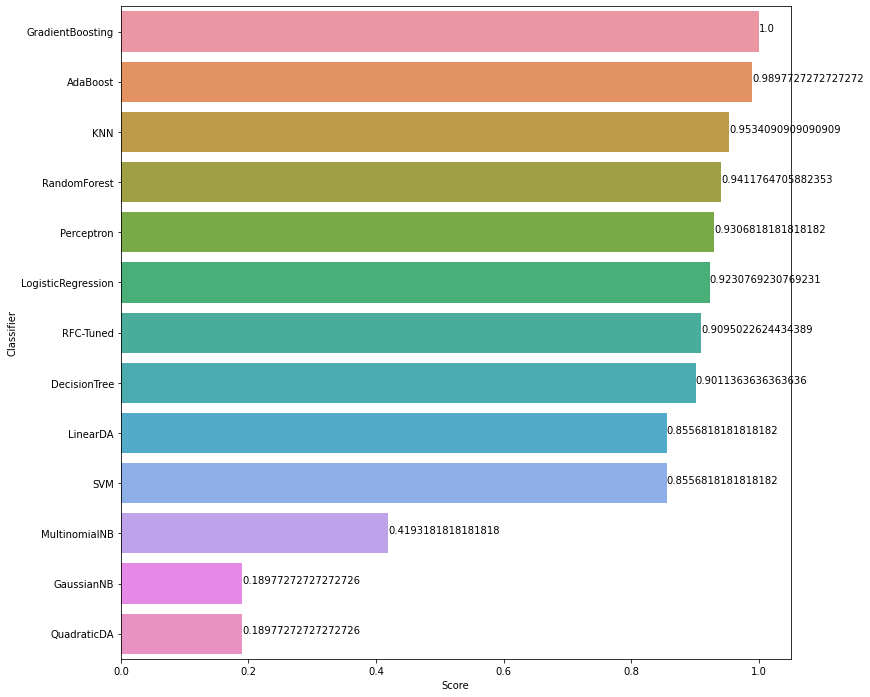

In [156]:
Cassifier = list(data["Classifier"])
Score = list(data["Score"])
plt.figure(figsize=(12, 12))
plt.xlabel('Score')
plt.ylabel('Classifier')
g1 = sns.barplot(x=Score, y=Cassifier,ci=67,orient="h")
for i in range(len(Score)):    
    g1.text(Score[i],i,(lambda x:format(x,','))(Score[i]),color="black",ha="left")
plt.show()

The graph above illustrates that Gradient Boosting is the best method, and AdaBoost, KNN, RandomForest are also agreeable methods for this task.  
Gaussian Naive Bayes, Multinomial Naive Bayes and Quadratic Discriminant Analysis are inappropriate methods for this task with less than 0.5 classifying score.